<a href="https://colab.research.google.com/github/strange-hawk/ml_nn/blob/master/gan_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
only_zeros = x_train[y_train==0] 

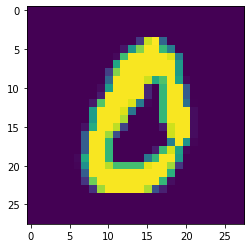

In [74]:
plt.imshow(only_zeros[19])

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Reshape

In [0]:
descriminator = Sequential()
descriminator.add(Flatten(input_shape=[28,28]))
descriminator.add(Dense(150,activation = 'relu'))
descriminator.add(Dense(100,activation = 'relu'))
descriminator.add(Dense(1,activation='sigmoid'))

descriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [0]:
coding_size = 100
# 100 --> 150 --> 784

generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [0]:
GAN = Sequential([generator,descriminator])

In [0]:
descriminator.trainable=False

In [0]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [0]:
batch_size=32

In [0]:
my_data=only_zeros

In [0]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [0]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [0]:
epochs=15

In [16]:
GAN.layers[0].layers

In [17]:
GAN.layers[1].layers
# descrimiator

In [30]:
generator, descriminator = GAN.layers

for epoch in range(epochs):
  print(f'currently on epoch {epoch+1}')
  i=0
  for x_batch in dataset:
    i=i+1
    if i%100 == 0:
      print(f'currently on batch {i} of {len(my_data)//batch_size}')
    
    # descriminator training phase
    noise = tf.random.normal(shape=[batch_size,coding_size])
    gen_images = generator(noise)
    x_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(x_batch,tf.float32)],axis=0)
    y1 = tf.constant([[0.0]]* batch_size + [[1.0]]*batch_size)

    descriminator.trainable=True
    descriminator.train_on_batch(x_fake_vs_real,y1)

    # train generator
    noise = tf.random.normal(shape=[batch_size,coding_size])
    y2 = tf.constant([[1.0]]*batch_size)
    descriminator.trainable=False
    GAN.train_on_batch(noise,y2)

currently on epoch 1
currently on batch 100 of 185
currently on epoch 2
currently on batch 100 of 185
currently on epoch 3
currently on batch 100 of 185
currently on epoch 4
currently on batch 100 of 185
currently on epoch 5
currently on batch 100 of 185
currently on epoch 6
currently on batch 100 of 185
currently on epoch 7
currently on batch 100 of 185
currently on epoch 8
currently on batch 100 of 185
currently on epoch 9
currently on batch 100 of 185
currently on epoch 10
currently on batch 100 of 185
currently on epoch 11
currently on batch 100 of 185
currently on epoch 12
currently on batch 100 of 185
currently on epoch 13
currently on batch 100 of 185
currently on epoch 14
currently on batch 100 of 185
currently on epoch 15
currently on batch 100 of 185


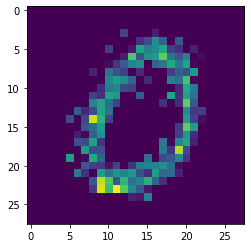

In [36]:
noise = tf.random.normal(shape=[10,coding_size])
images = generator(noise)
plt.imshow(np.array(images)[3])

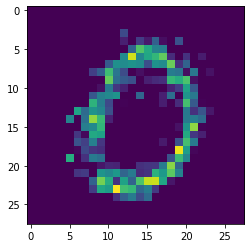

In [37]:
noise = tf.random.normal(shape=[10,coding_size])
images = generator(noise)
plt.imshow(np.array(images)[3])

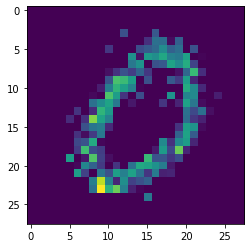

In [38]:
noise = tf.random.normal(shape=[10,coding_size])
images = generator(noise)
plt.imshow(np.array(images)[3])